<a href="https://colab.research.google.com/github/UiinKim/UiinKim/blob/main/TextRank_Based_on_Sentence_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import gensim
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

In [3]:
urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall()
zf.close()


In [5]:
glove_dict=dict()
f=open('glove.6B.100d.txt', encoding='utf8') #100차원의 Glove 사용

for line in f:
  word_vector=line.split()
  word=word_vector[0] #0번 인덱스에 저장되어있는 단어 저장
  word_vector_arr=np.asarray(word_vector[1:], dtype='float32') #1번 인덱스부터 있는 정수 배열을 저장
  glove_dict[word]=word_vector_arr
f.close()

In [6]:
glove_dict['dog']

array([ 0.30817  ,  0.30938  ,  0.52803  , -0.92543  , -0.73671  ,
        0.63475  ,  0.44197  ,  0.10262  , -0.09142  , -0.56607  ,
       -0.5327   ,  0.2013   ,  0.7704   , -0.13983  ,  0.13727  ,
        1.1128   ,  0.89301  , -0.17869  , -0.0019722,  0.57289  ,
        0.59479  ,  0.50428  , -0.28991  , -1.3491   ,  0.42756  ,
        1.2748   , -1.1613   , -0.41084  ,  0.042804 ,  0.54866  ,
        0.18897  ,  0.3759   ,  0.58035  ,  0.66975  ,  0.81156  ,
        0.93864  , -0.51005  , -0.070079 ,  0.82819  , -0.35346  ,
        0.21086  , -0.24412  , -0.16554  , -0.78358  , -0.48482  ,
        0.38968  , -0.86356  , -0.016391 ,  0.31984  , -0.49246  ,
       -0.069363 ,  0.018869 , -0.098286 ,  1.3126   , -0.12116  ,
       -1.2399   , -0.091429 ,  0.35294  ,  0.64645  ,  0.089642 ,
        0.70294  ,  1.1244   ,  0.38639  ,  0.52084  ,  0.98787  ,
        0.79952  , -0.34625  ,  0.14095  ,  0.80167  ,  0.20987  ,
       -0.86007  , -0.15308  ,  0.074523 ,  0.40816  ,  0.0192

In [7]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199769 sha256=479921207f12becbd1e84e914d3b6a88fbde4a6993cdcbf603fb903a388fd27c
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [13]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.8 MB/s eta 0:00:00


In [19]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("vocab-transformers/distilbert-word2vec_256k-MLM_1M")
model = AutoModelForMaskedLM.from_pretrained("vocab-transformers/distilbert-word2vec_256k-MLM_1M")

In [22]:
embedding_dim=100
zero_vector=np.zeros(embedding_dim) #glove_ditc에 존재하지 않는 OOV가 존재할 경우 embedding_dim 차원의 0벡터를 사용

In [23]:
#단어 벡터의 평균으로부터 문장 벡터를 얻는다.
def calculate_sentence_vector(sentence):
  return sum([glove_dict.get(word, zero_vector) for word in sentence])/len(sentence) #word가 없을 경우 zero_vector를 더한다.

In [26]:
eng_sent=['I', 'am', 'a', 'student']
sentence_vector=calculate_sentence_vector(eng_sent)
print(len(sentence_vector))

100


In [28]:
kor_sent=['전', '좋은', '학생', '입니다']
sentence_vector=calculate_sentence_vector(kor_sent)
print((sentence_vector)) #Glove는 영어에 대한 학습되어 있으므로 OOV발생하여 모두 0으로 대체된다.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [29]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
stop_words=stopwords.words('english')

In [33]:
urlretrieve("https://raw.githubusercontent.com/prateekjoshi565/textrank_text_summarization/master/tennis_articles_v4.csv", filename='tennis_articles_v4.csv')
data=pd.read_csv('tennis_articles_v4.csv')
data.head()

,article_id,article_text,source
0,1,Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,"BASEL, Switzerland (AP), Roger Federer advance...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
data=data[['article_text']]#article_text만 사용
data['sentences']=data['article_text'].apply(sent_tokenize) #sent_tokenize를 통해 문장 토큰화 실행
data

,article_text,sentences
0,Maria Sharapova has basically no friends as te...,[Maria Sharapova has basically no friends as t...
1,"BASEL, Switzerland (AP), Roger Federer advance...","[BASEL, Switzerland (AP), Roger Federer advanc..."
2,Roger Federer has revealed that organisers of ...,[Roger Federer has revealed that organisers of...
3,Kei Nishikori will try to end his long losing ...,[Kei Nishikori will try to end his long losing...
4,"Federer, 37, first broke through on tour over ...","[Federer, 37, first broke through on tour over..."
5,Nadal has not played tennis since he was force...,[Nadal has not played tennis since he was forc...
6,"Tennis giveth, and tennis taketh away. The end...","[Tennis giveth, and tennis taketh away., The e..."
7,Federer won the Swiss Indoors last week by bea...,[Federer won the Swiss Indoors last week by be...


In [37]:
#토큰화 함수
def tokenization(sentences):
  return [word_tokenize(sentence)for sentence in sentences]

#전처리 함수
def preprocess_sentence(sentence):
  sentence=[re.sub(r'[^a-zA-Z\s]', '', word).lower()for word in sentence]
  return [word for word in sentence if not word in stop_words and word]#불용어 x and 실제로 존재하는 단어

def prerprocess_sentences(sentences):
  return [preprocess_sentence(sentence)for sentence in sentences]

In [39]:
data['tokenized_sentences']=data['sentences'].apply(tokenization)
data['tokenized_sentences']=data['tokenized_sentences'].apply(prerprocess_sentences)
data

,article_text,sentences,tokenized_sentences
0,Maria Sharapova has basically no friends as te...,[Maria Sharapova has basically no friends as t...,"[[maria, sharapova, basically, friends, tennis..."
1,"BASEL, Switzerland (AP), Roger Federer advance...","[BASEL, Switzerland (AP), Roger Federer advanc...","[[basel, switzerland, ap, roger, federer, adva..."
2,Roger Federer has revealed that organisers of ...,[Roger Federer has revealed that organisers of...,"[[roger, federer, revealed, organisers, relaun..."
3,Kei Nishikori will try to end his long losing ...,[Kei Nishikori will try to end his long losing...,"[[kei, nishikori, try, end, long, losing, stre..."
4,"Federer, 37, first broke through on tour over ...","[Federer, 37, first broke through on tour over...","[[federer, first, broke, tour, two, decades, a..."
5,Nadal has not played tennis since he was force...,[Nadal has not played tennis since he was forc...,"[[nadal, played, tennis, since, forced, retire..."
6,"Tennis giveth, and tennis taketh away. The end...","[Tennis giveth, and tennis taketh away., The e...","[[tennis, giveth, tennis, taketh, away], [end,..."
7,Federer won the Swiss Indoors last week by bea...,[Federer won the Swiss Indoors last week by be...,"[[federer, swiss, indoors, last, week, beating..."


In [40]:
embedding_dim=100
zero_vector=np.zeros(embedding_dim)

In [41]:
#단어 벡터의 평균으로부터 문장 벡터를 얻는다
def calculate_sentence_vector(sentence):
  if len(sentence)!=0:
    return sum([glove_dict.get(word, zero_vector) for word in sentence])/len(sentence)
  else:
    return zero_vector

In [42]:
#각 문장에 대해서 문장 벡터를 반환
def sentences_to_vectors(sentences):
  return[calculate_sentence_vector(sentence)for sentence in sentences]

In [44]:
data['SentenceEmbedding']=data['tokenized_sentences'].apply(sentences_to_vectors)
data[['SentenceEmbedding']]

,SentenceEmbedding
0,"[[0.051488996, 0.1105585, 0.6950863, 0.1891917..."
1,"[[0.10566062456928194, -0.10534465219825506, 0..."
2,"[[-0.022272188, -0.0474477, 0.14933074, -0.086..."
3,"[[0.045201838, -0.064647146, 0.5035717, -0.160..."
4,"[[0.21536233, 0.180915, 0.25600883, 0.06924241..."
5,"[[0.04484453, -0.0074302587, 0.33349112, -0.07..."
6,"[[-0.115338005, -0.0062844106, 0.595185, -0.16..."
7,"[[0.0740439, 0.059211146, 0.49143884, 0.216771..."


In [46]:
#코사인 유사도를 구한 유사도 행렬
def similarity_matrix(sentence_embedding):
  sim_mat=np.zeros([len(sentence_embedding), len(sentence_embedding)])
  for i in range(len(sentence_embedding)):
    for j in range(len(sentence_embedding)):
      sim_mat[i][j]=cosine_similarity(sentence_embedding[i].reshape(1, embedding_dim), sentence_embedding[j].reshape(1, embedding_dim))[0,0]
      #코사인 유사도를 구하고 차원을 (1,embedding_dim)으로 바꾼 후 similarity[0,0]에 저장하고 이 값을 sim_mat[i][j]에 저장한다.
  return sim_mat

In [47]:
data['SimMatrix']=data['SentenceEmbedding'].apply(similarity_matrix)
data[['SimMatrix']]

,SimMatrix
0,"[[1.0, 0.6477208137512207, 0.5915699601173401,..."
1,"[[1.0000000000000002, 0.8745531210608369, 0.80..."
2,"[[0.9999998807907104, 0.913085401058197, 0.901..."
3,"[[0.9999999403953552, 0.7769179305294039, 0.84..."
4,"[[0.9999999403953552, 0.8306209732530097, 0.90..."
5,"[[1.0, 0.8843014240264893, 0.8540289072721128,..."
6,"[[1.0, 0.473054975271225, 0.45002683997154236,..."
7,"[[1.0000001192092896, 0.7634095600081803, 0.78..."


In [48]:
print('두번째 샘플의 문장 개수', len(data['tokenized_sentences'][1]))
print('두번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) : ', np.shape(data['SentenceEmbedding'][1]))
print('두번째 샘플의 유사도 행렬 크기(shape) : ', np.shape(data['SimMatrix'][1]) )

두번째 샘플의 문장 개수 12
두번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) :  (12, 100)
두번째 샘플의 유사도 행렬 크기(shape) :  (12, 12)


In [49]:
#유사도 행렬 그래프
def draw_graphs(sim_matrix):
  nx_graph=nx.from_numpy_array(sim_matrix)
  plt.figure(figsize=(10,10))
  pos=nx.spring_layout(nx_graph)
  nx.draw(nx_graph, with_labels=True, font_weight='bold')
  nx.draw_network_edge_labels(nx_graph, pos, font_color='red')
  plt.show()

AttributeError: ignored

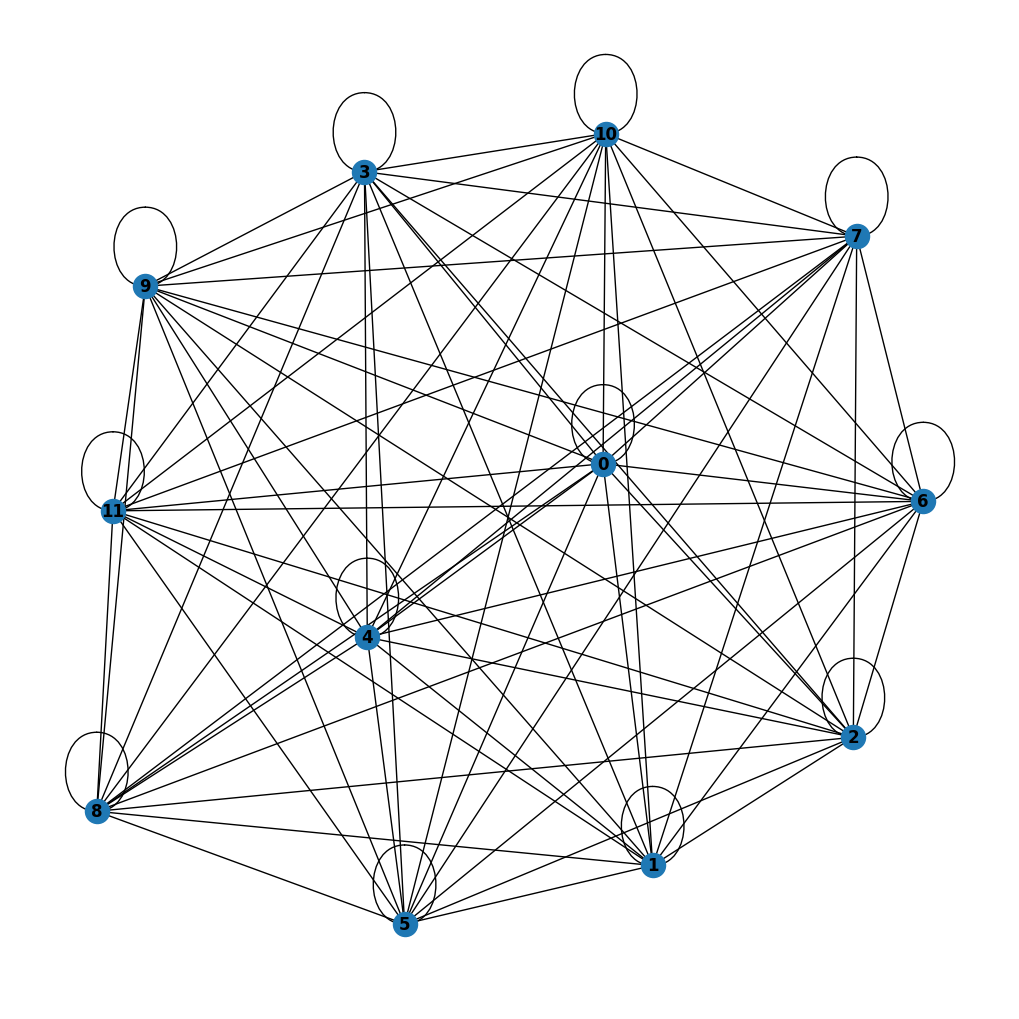

In [50]:
draw_graphs(data['SimMatrix'][1])

In [51]:
#그래프를 페이지랭크의 알고리즘의 입력으로 사용하여 점수를 구한다.
def calculate_score(sim_matrix):
  nx_graph=nx.from_numpy_array(sim_matrix)
  scores=nx.pagerank(nx_graph)
  return scores

In [52]:
data['score']=data['SimMatrix'].apply(calculate_score)
data[['SimMatrix', 'score']]

,SimMatrix,score
0,"[[1.0, 0.6477208137512207, 0.5915699601173401,...","{0: 0.054921591857231694, 1: 0.062865197127825..."
1,"[[1.0000000000000002, 0.8745531210608369, 0.80...","{0: 0.0831509438964348, 1: 0.08498611318825285..."
2,"[[0.9999998807907104, 0.913085401058197, 0.901...","{0: 0.06241886943566914, 1: 0.0630719696070255..."
3,"[[0.9999999403953552, 0.7769179305294039, 0.84...","{0: 0.08164728322073438, 1: 0.0727647939629649..."
4,"[[0.9999999403953552, 0.8306209732530097, 0.90...","{0: 0.056579260387682476, 1: 0.051916659644059..."
5,"[[1.0, 0.8843014240264893, 0.8540289072721128,...","{0: 0.08288694384176991, 1: 0.0840376031405664..."
6,"[[1.0, 0.473054975271225, 0.45002683997154236,...","{0: 0.07336251821036095, 1: 0.1050889009405666..."
7,"[[1.0000001192092896, 0.7634095600081803, 0.78...","{0: 0.04462886337579034, 1: 0.0482048359179678..."


In [53]:
data['score'][1]

{0: 0.0831509438964348,
 1: 0.08498611318825285,
 2: 0.0855501969882867,
 3: 0.08383717254942684,
 4: 0.0813793988323122,
 5: 0.0843928498199495,
 6: 0.08507725733330257,
 7: 0.08092839239693102,
 8: 0.07454046010944942,
 9: 0.08535837210459046,
 10: 0.08498242787885528,
 11: 0.08581641490220814}

In [54]:
#점수가 가장 높은 상위 n개를 선택하여 문서의 요약문으로 삼는다.
def ranked_sentences(sentences, scores, n=3):
  top_scores=sorted(((scores[i],s) for i, s, in enumerate(sentences)), reverse=True)
  top_n_sentences=[sentence for scroe, sentence in top_scores[:n]]
  return " ".join(top_n_sentences)

In [55]:
#data에 summary 열을 추가하여 요약문을 저장한다.
data['summary']=data.apply(lambda x:ranked_sentences(x.sentences, x.score), axis=1)

In [56]:
for i in range(0, len(data)):
  print(i+1, "번 문서")
  print('원문 : ', data.loc[i].article_text)
  print('')
  print('요약 : ', data.loc[i].summary)
  print('')

1 번 문서
원문 :  Maria Sharapova has basically no friends as tennis players on the WTA Tour. The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much. I think everyone knows this is my job here. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends away from the courts.' When she said she is not really close to a lot of players, is that something strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. I think just because you're 